# 17-644: Applied Deep Learning
Carnegie Mellon University

@msahinoz

The goal is to explore the MNIST Handwritten Digits dataset and complete the following steps:

- Visualize data: Plot one example from each class (0 to 9) to understand the data distribution.
- Grayscale analysis: Select two digit classes, plot histograms of pixel intensity values, and analyze differences.
- Build a neural net: Create a simple model to classify digits using pixel values as inputs.
- Evaluate performance: Train, validate, and visualize model performance using loss and accuracy curves.
- Calculate parameters: Compare your manual parameter calculation to TensorFlow's model.summary().



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

Visualizing data

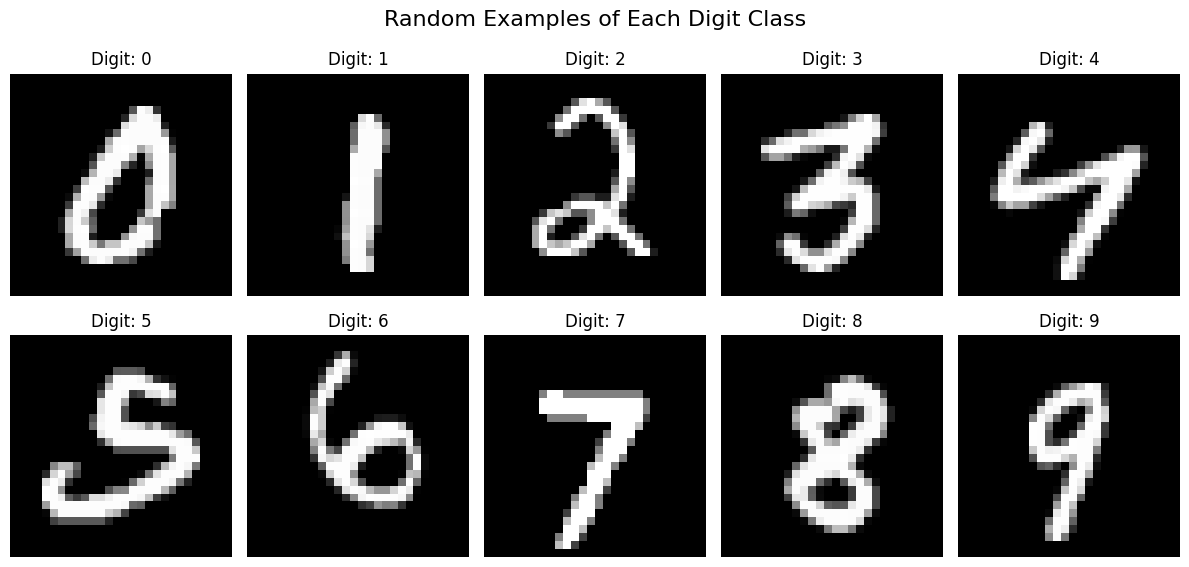

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle('Random Examples of Each Digit Class', fontsize=16)
for i in range(10):
    ax = axes[i // 5, i % 5]
    class_indices = np.where(y_train == i)[0]
    random_index = np.random.choice(class_indices)
    ax.imshow(X_train[random_index], cmap='gray')
    ax.axis('off')
    ax.set_title(f"Digit: {i}")

plt.tight_layout()
plt.show()

Grayscale histogram analysis

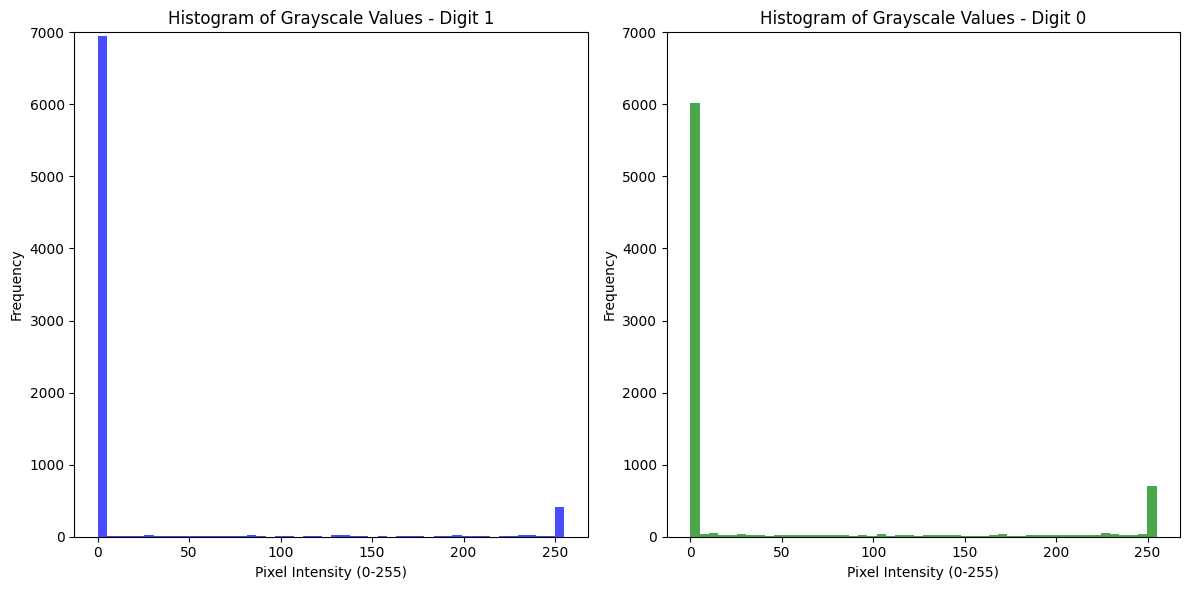

In [3]:
class_1 = 1
class_2 = 0

np.random.seed(42)
class_1_indices = np.random.choice(np.where(y_train == class_1)[0], size=10, replace=False)
class_2_indices = np.random.choice(np.where(y_train == class_2)[0], size=10, replace=False)

class_1_pixels = np.array([X_train[i].flatten() for i in class_1_indices]).flatten()
class_2_pixels = np.array([X_train[i].flatten() for i in class_2_indices]).flatten()
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(class_1_pixels, bins=50, color='blue', alpha=0.7, range=(0, 255))
plt.title(f'Histogram of Grayscale Values - Digit {class_1}')
plt.xlabel('Pixel Intensity (0-255)')
plt.ylabel('Frequency')
plt.ylim(0, 7000)

plt.subplot(1, 2, 2)
plt.hist(class_2_pixels, bins=50, color='green', alpha=0.7, range=(0, 255))
plt.title(f'Histogram of Grayscale Values - Digit {class_2}')
plt.xlabel('Pixel Intensity (0-255)')
plt.ylabel('Frequency')
plt.ylim(0, 7000)

plt.tight_layout()
plt.show()

Building the Neural Net

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# normalize daya via scaling pixel values to 0-1 from 0-255
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)), # convert 28*28 to 1d vector
    layers.Dense(128, activation='relu'), # 1st hidden layer
    layers.Dense(64, activation='relu'), # 2nd hidden layer
    layers.Dense(10, activation='softmax') # output layer for 10 classes (all digits classified)
])

model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model.summary()


/opt/anaconda3/envs/applieddeeplearning_gpu/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-03-31 20:06:05.262953: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2025-03-31 20:06:05.262977: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-03-31 20:06:05.262981: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-03-31 20:06:05.262995: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-31 20:06:05.263004: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Training the model

In [ ]:

history = model.fit(X_train_normalized, y_train, epochs=20, validation_data=(X_test_normalized, y_test), batch_size=64)

Epoch 1/20


2025-03-31 20:06:05.699531: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8328 - loss: 0.5657 - val_accuracy: 0.8829 - val_loss: 0.4458
Epoch 2/20
414/938 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8769 - loss: 0.4920

KeyboardInterrupt: 

START FROM HERE!

Visualizing the performance

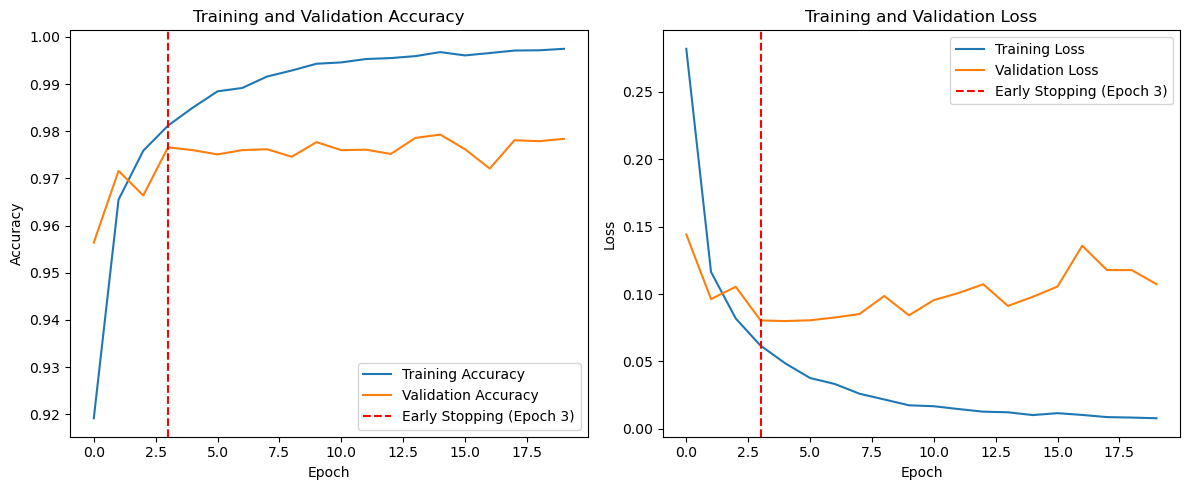

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axvline(x=3, color='red', linestyle='--', label='Early Stopping (Epoch 3)')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axvline(x=3, color='red', linestyle='--', label='Early Stopping (Epoch 3)')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
